## Projek Prediksi Harga Rumah di US 🤨 🧐 
#### 1. Business Understanding 😇 
Disini aku mau mencoba untuk memprediksi Harga rumah di Kabupaten King di Provinsi Washington😆 di Negara US. Seperti yang diketahui bahwa harga rumah-rumah akhir dekade ini mengalami peningkatan yang signifikan di seluruh Dunia. Namun masih banyak orang, khususnya generasi anak muda, saat ini masih sedikit yang melek akan peningkatan harga Rumah 😱😱. Salah satu step atau solusi untuk membuka mata generasi anak muda yaitu dengan melihat bagaimana perkembangan dan prediksi harga rumah kedepannya. Maka dari itu salah satu solusi yang bisa saya buat yaitu model prediksi (kalau bisa sampai tahap deploy dengan azure/aws). Pada kernel ini sebagian besar saya akan menggunakan beberapa teknik dari regresi linear. Ayoo 🫡

#### 2. Data Understanding 😁
King County adalah rumah bagi kota terbesar dan kelima terbesar di kota Bagian Washington, yaitu Seattle dan Bellevue, yang bersama dengan kota terbesar ketiga, Tacoma, membentuk wilayah metropolitan Seattle. Dataset yang digunakan didapat dari kaggle atau kc_house_data dimana fitur-fiturnya berisikan
- id: primary keynya
- date: waktu timeseries dari data dimasukkan
- price: harga rumah
- bedrooms: jumlah kamar
- bathrooms: jumlah kamar mandi
- sqft_living: luas bangunan/rumah meter persegi
- sqft_lot: luas tanah
- floors: jumlah lantai
- waterfront: ada pemandangan perairan
- view: jumlah rumah tersebut dilihat (dikategorikan menjadi 4: angka 4 artinya rame dilihat)
- condition: seberapa bagus kondisi rumah tersebut
- grade: skor atau tingkatan rumah yang diberikan oleh pemerintah setempat
- sqft_above: luas rumah juga tapi selain basemen
- sqft_basement: luas basemen
- yr_built: tahun rumah dibangun
- yr_renovated: tahun rumah direnovasi
- zipcode: kode pos
- lat: latitude
- long: longitude
- sqft_living15: luas ruang tamu di rumah
- sqft_lot15: luas tanah kavling di rumahnya
#### 3. Data Preparation: Feature Engineering 😢
- Binning
- Scaling
- Outlier Removal
- Transformasi Data

#### 4. Modelling 😨 😰
- Linear Regression
- OLS
- Elastic Net
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boost

#### 5. Evaluation 🧐 🤓 😎
- MSE
- RMSE
- R2

😀 😃 😄 😁 😆 😅 😂 🤣 🥲 🥹 ☺️ 😊 😇 🙂 🙃 😉 😌 😍 🥰 😘 😗 😙 😚 😋 😛 😝 😜 🤪 🤨 🧐 🤓 😎 🥸 🤩 🥳 😏 😒 😞 😔 😟 😕 🙁 ☹️ 😣 😖 😫 😩 🥺 😢 😭 😮‍💨 😤 😠 😡 🤬 🤯 😳 🥵 🥶 😱 😨 😰 😥 😓 🫣 🤗 🫡 🤔 🫢 🤭 🤫 🤥 😶 😶‍🌫️ 😐 😑 😬 🫨 🫠 🙄 😯 😦 😧 😮 😲 🥱 😴 🤤 😪 😵 😵‍💫 🫥 🤐 🥴 🤢 🤮 🤧 😷 🤒 🤕 🤑 🤠 😈 👿 👹 👺 🤡 💩 👻 💀 ☠️ 👽 👾 🤖 🎃 😺 😸 😹 😻 😼 😽 🙀 😿 😾✅❌

In [1]:
import os
import glob
import json
import folium
from math import sqrt
from pyforest import *
%matplotlib inline
import branca.colormap as cm
from datetime import datetime
plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>

In [2]:
folder_path = 'C:/Users/Asus/dataset/hargarumah'
os.listdir(folder_path)
df= pd.read_csv(os.path.join(folder_path, 'kc_house_data.csv'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### EDA 😵‍💫😵‍💫

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# info
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Awal-awal cek data:

- waterfront(dekat laut) adalah variabel diskrit biner (0 = bukan di tepi laut, 1 = tepi laut)
- sqft_above + sqft_basement = sqft_rumah (luas rumah)
- sqft_basement, view, dan yr_renovated memiliki banyak nilai nol, yang berpotensi mengekspresikannya sebagai variabel biner (waduhh)
- tidak ada duplicate value and missing value
- mengganti kolom 'date' menjadi tipe timestamp dmy
- tidak menggunakan data longlat (kecuali untuk viz di Tableau)

sehingga nantinya akan ada data kategorikal dan yang data kontinyuu:
- kontinyu	: price, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15

- kategorikal	: floors, view, grade, zipcode, bathrooms, bedrooms, condition

(ada kemungkinan yang kategorikal aku terapkan one hot encodingg)

In [7]:
df = df.drop(['long', 'lat'], axis=1)

In [8]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [9]:
# kolom date jadi  format waktu
df['waktu'] = [x[:8] for x in df.date]
df.waktu = df.waktu.apply(lambda x: datetime.strptime(x, '%Y%m%d')) #lmbda operasi convert ke dt
df.drop(columns='date', inplace=True)

In [10]:
df = df.drop(['id'], axis=1)

In [11]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,waktu
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014-10-13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014-12-09
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015-02-25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014-12-09
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015-02-18


##### Statistik deskriptif 

In [12]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
price,21613.0,540088.141767,75000.0,321950.0,450000.0,645000.0,7700000.0,367127.196483
bedrooms,21613.0,3.370842,0.0,3.0,3.0,4.0,33.0,0.930062
bathrooms,21613.0,2.114757,0.0,1.75,2.25,2.5,8.0,0.770163
sqft_living,21613.0,2079.899736,290.0,1427.0,1910.0,2550.0,13540.0,918.440897
sqft_lot,21613.0,15106.967566,520.0,5040.0,7618.0,10688.0,1651359.0,41420.511515
floors,21613.0,1.494309,1.0,1.0,1.5,2.0,3.5,0.539989
waterfront,21613.0,0.007542,0.0,0.0,0.0,0.0,1.0,0.086517
view,21613.0,0.234303,0.0,0.0,0.0,0.0,4.0,0.766318
condition,21613.0,3.40943,1.0,3.0,3.0,4.0,5.0,0.650743
grade,21613.0,7.656873,1.0,7.0,7.0,8.0,13.0,1.175459


ada beberapa fitur yang nilai minimunnya itu 0 (mungkin anomali lets see)
cuman bedroom dan bathrom (sisanya itu kategorikal)

In [13]:
# anomali bedroom
print(df[df['bedrooms']==0].shape) #ada berapa

print((df[df['bedrooms']==0].shape[0])/(len(df))*100)

(13, 18)
0.0601489844075325


In [14]:
df[df['bedrooms']==0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,waktu
875,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,2360,4000,2014-06-12
3119,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,1470,1399,2015-02-05
3467,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,1430,1650,2014-08-05
4868,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,2170,6000,2014-10-02
6994,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,4740,35061,2014-06-24
8477,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,2500,8751,2014-11-17
8484,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,1810,5685,2014-09-25
9773,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,2520,8050,2015-04-29
9854,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,1060,7200,2014-12-23
12653,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,1500,4675,2015-02-18


In [15]:
#hapus yg 0 kamarnya
df = df[df['bedrooms']>0]
len(df)

21600

In [16]:
# lakuin hal yang sama tapi untuk kmar mandi
print(df[df['bathrooms']==0].shape) #ada berapa

print((df[df['bathrooms']==0].shape[0])/(len(df))*100)

(3, 18)
0.013888888888888888


In [17]:
df = df[df['bathrooms']>0] #cuman 3 data
len(df)

21597

#### analisis univariate - harga (target)

In [18]:
#cari skewness atau condong ke mana
harga_skew = round(df['price'].skew(), 2)
harga_skew

4.03

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

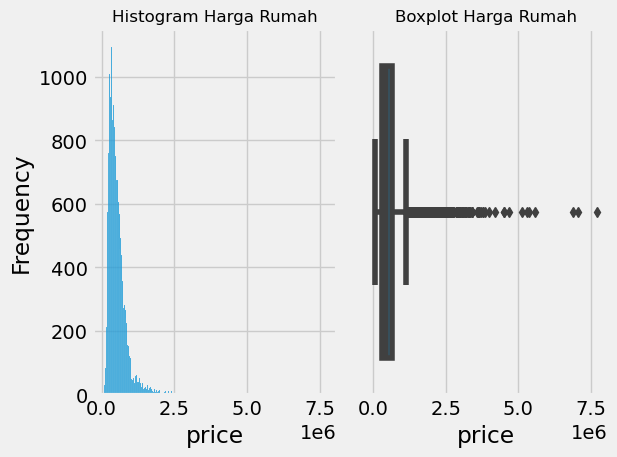

In [19]:
#viz
plt.subplot(121)
sns.histplot(data=df,x='price')
plt.title(f'Histogram Harga Rumah',fontsize=12) 
plt.ylabel('Frequency')

plt.subplot(122)
sns.boxplot(data=df,x='price')
plt.title(f'Boxplot Harga Rumah',fontsize=12)

plt.tight_layout()
plt.show()

Target atau harga rumah memiliki distribusi persebaran skew positif dengan nilai skew sebesar 4.03. Selain itu, data harga rumah memiliki banyak outlier, sehingga untuk analisa akan menggunakan median sebagai centre of tendency

### analisis bivariate sama multivariate
- korelasi matriks heatmap
- analisis faktor kontinyu
- faktor kategorikal

In [20]:
kategori = df[['view', 'condition', 'grade', 'waterfront', 'floors', 'bedrooms', 'bathrooms', 'zipcode']]
kontinyu = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']]

In [21]:
col_kat = kategori.columns
col_koy = kontinyu.columns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

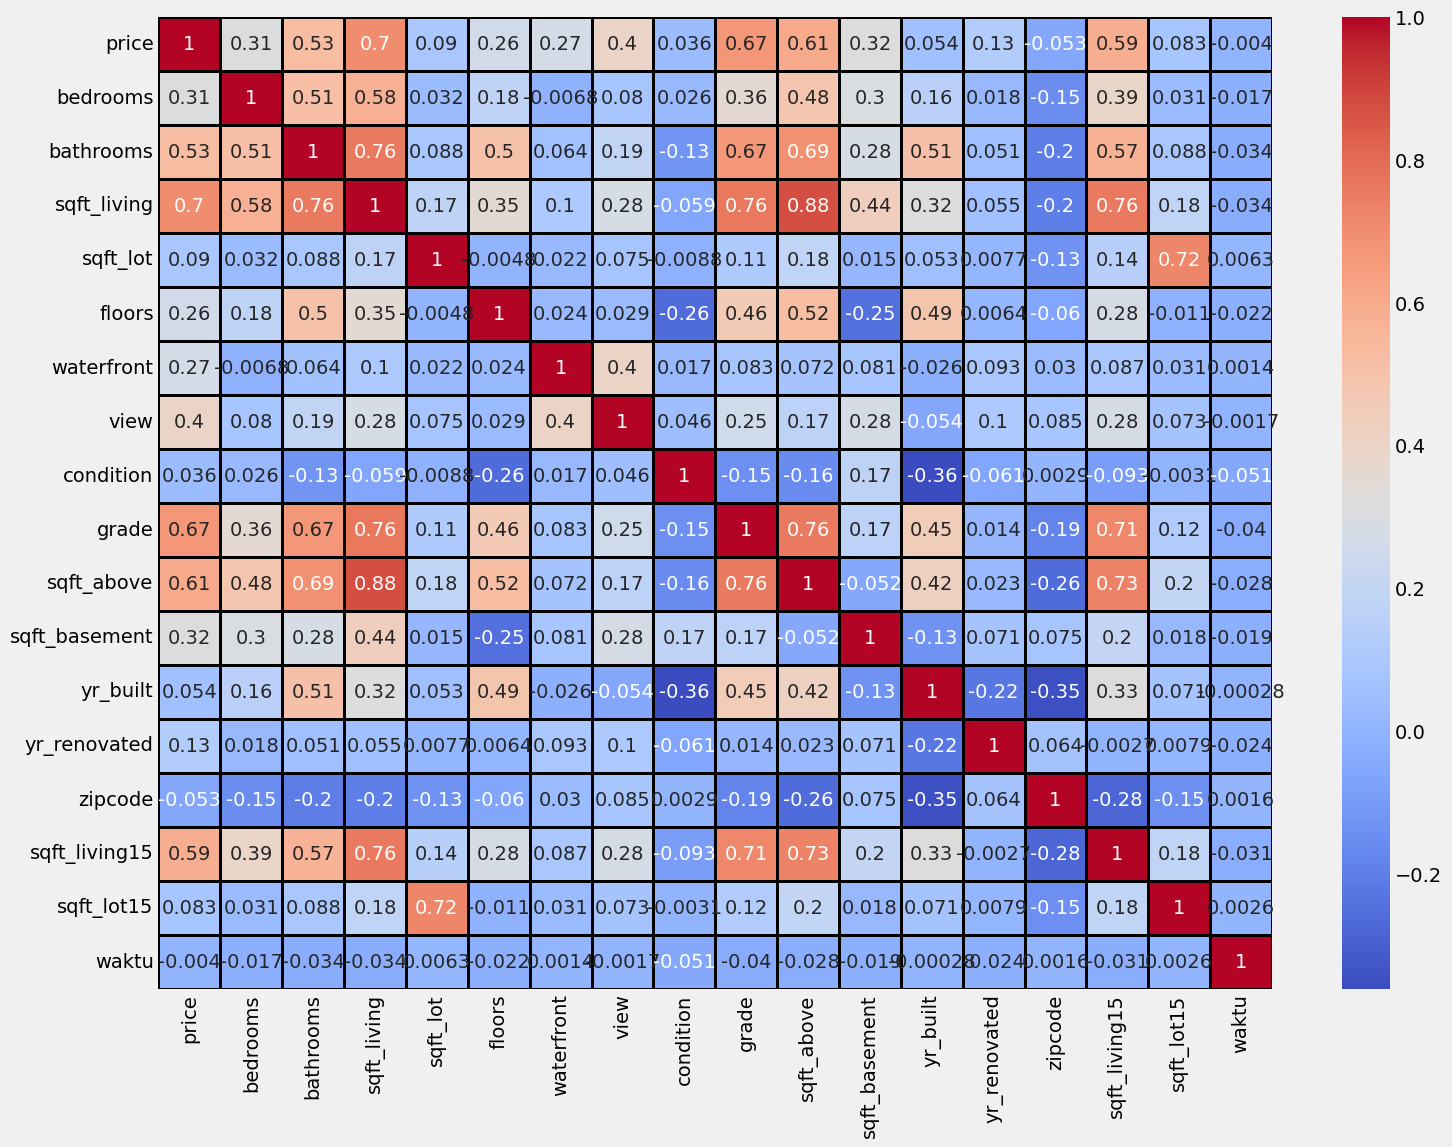

In [22]:
# korelasi heatmap

corr_matrix = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linecolor='black', linewidths=1.0, xticklabels=True, yticklabels=True)
plt.show()

- Kolom harga itu memiliki korelasi kuat terhadap sqft_living, dan grade
- Kolom harga itu memiliki korelasi sedang terhadap bathrooms, sqft_above, sqft_living15
- Kolom harga itu memiliki korelasi rendah terhadap bedrooms, floors, sqft_basement, latitude
- Kolom harga itu tidak terlalu punya korelasi terhadap sqft_lot, yr_built, long, sqft_lot15

#### analiss faktor kontinyu

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ASUS\anaconda3\Lib\site

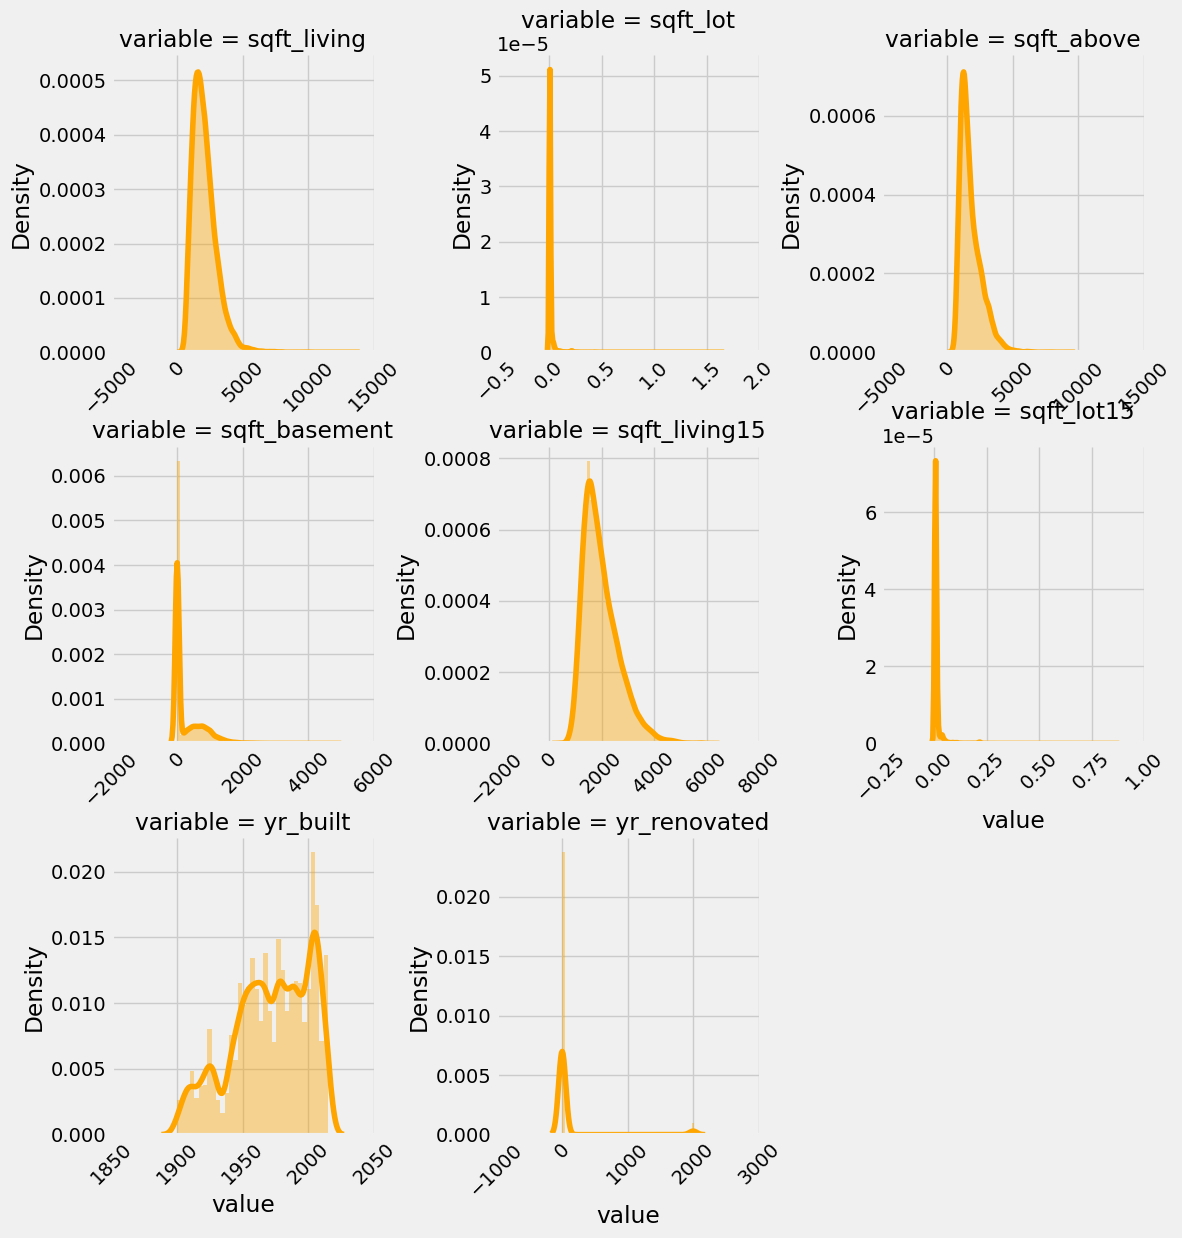

In [23]:
# viz dari persebaran data dari data kontinyu

koy_1 = pd.melt(df, value_vars = col_koy)
g = sns.FacetGrid(koy_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.distplot, 'value', color='orange') #udah coba pake hisplot, displot
g.set_xticklabels(rotation=45)

- Pada viz tersebut fitur sqft_living, sqft_above, dan sqvt_living15 itu cenderung skew condong ke kanan. Mungkin nanti ketika transofrmasi kita bisa menggunakan log atau logaritma
- Lalu pada fitur sqft_lot, sqft_lot15, sqft_basement, dan yr_renovated itu cenderung banyak nilai 0 nya atau rame di awal, mungkin kita bisa ubah jadi binari 0/1
- artinya kalau skew ke kanan itu ada data yang lebih tinggi dari rata-rata dan cukup banyaj

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


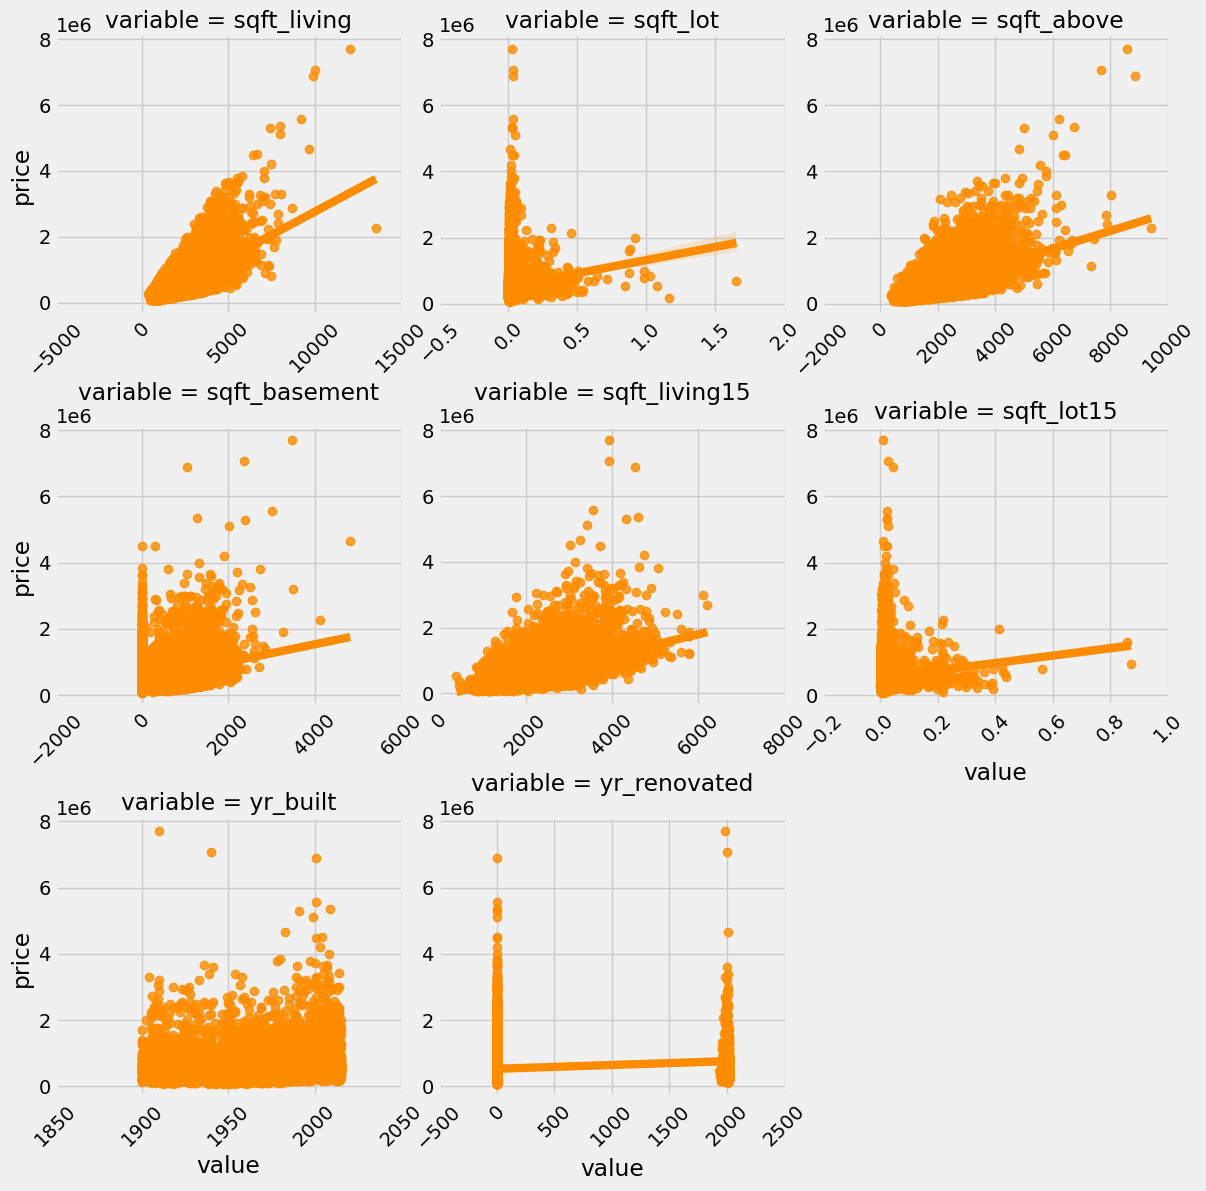

In [24]:
# mencoba viz dengan garis linear regresi

koy_2 = pd.melt(df, id_vars='price', value_vars=col_koy)
g = sns.FacetGrid(koy_2, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.regplot, 'value', 'price', color='darkorange')
g.set_xticklabels(rotation=45)

- fitur yr_renovated atau rumah yang direnovasi itu agak gimana gituu, jadi jomplang sangat besar dari 0 ke 2000. jadi mending diganti jadi kategorikal
- lagi-lagi kedua fitur sqft livng dan above itu paling tinggi korelasinya dengan harga rumah
- grafik yr_built agak susah dicari insightnya

#### analiss faktor kategorikal

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


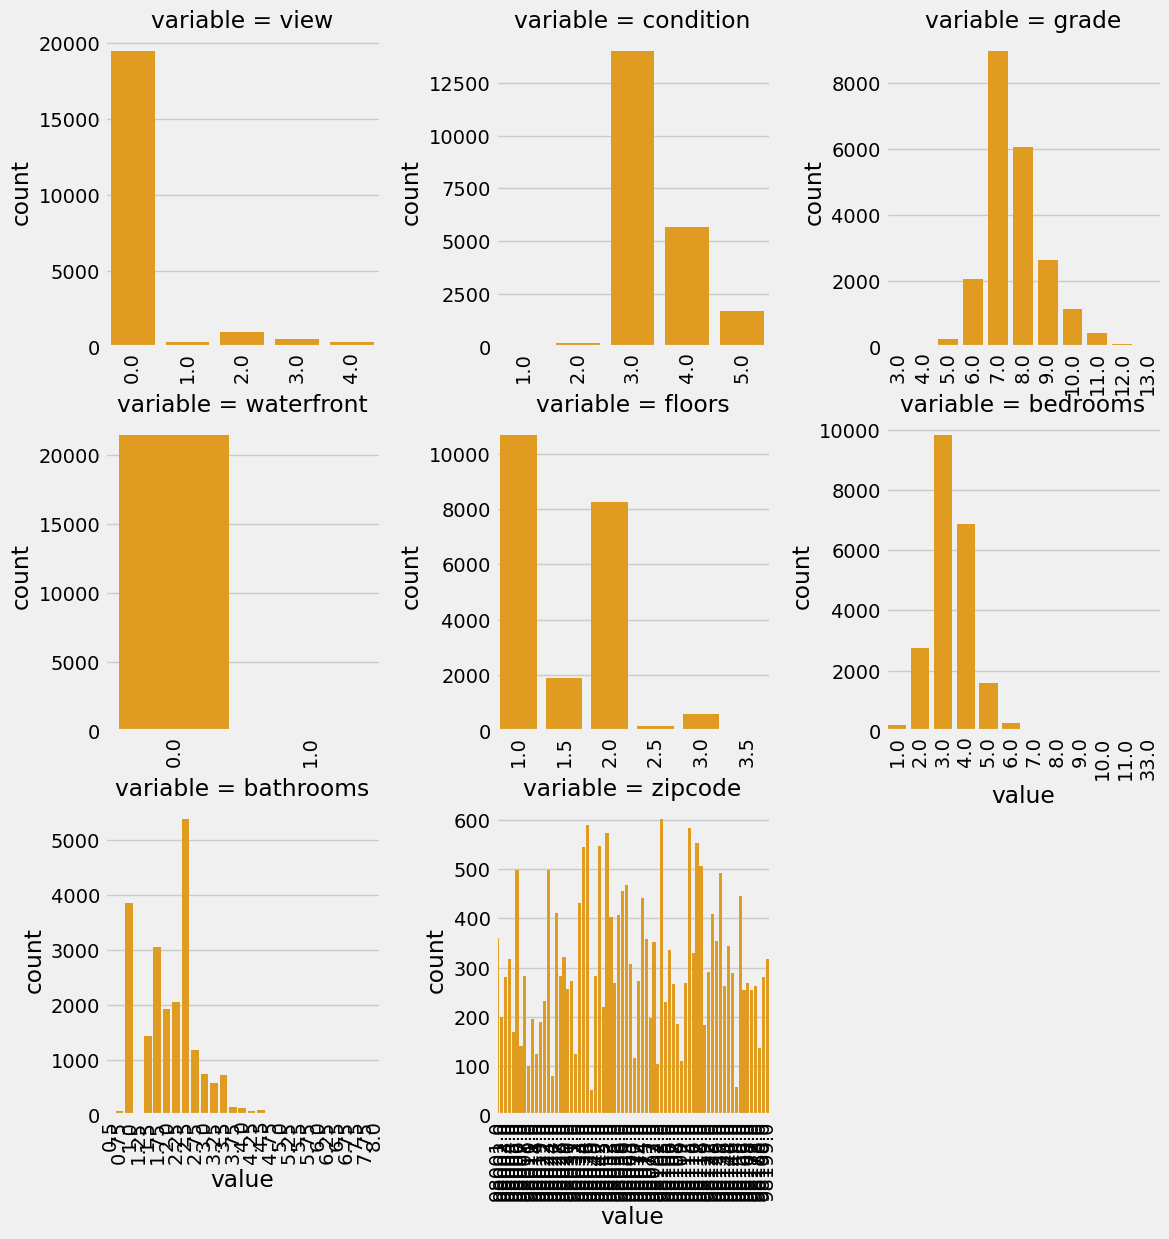

In [25]:
# viz beda tapi pakai grafik batang untuk data kategorikal

kat_1 = pd.melt(df, value_vars=col_kat)
g = sns.FacetGrid(kat_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.countplot, 'value', color='orange')
g.set_xticklabels(rotation=90)

- sepertinya ada fitur kategori seperti yang jika 0 itu memiliki arti dari fiturnya
- bedroom memiliki sedikit condong skew kanan namun bathroom itu skew ke kanan

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


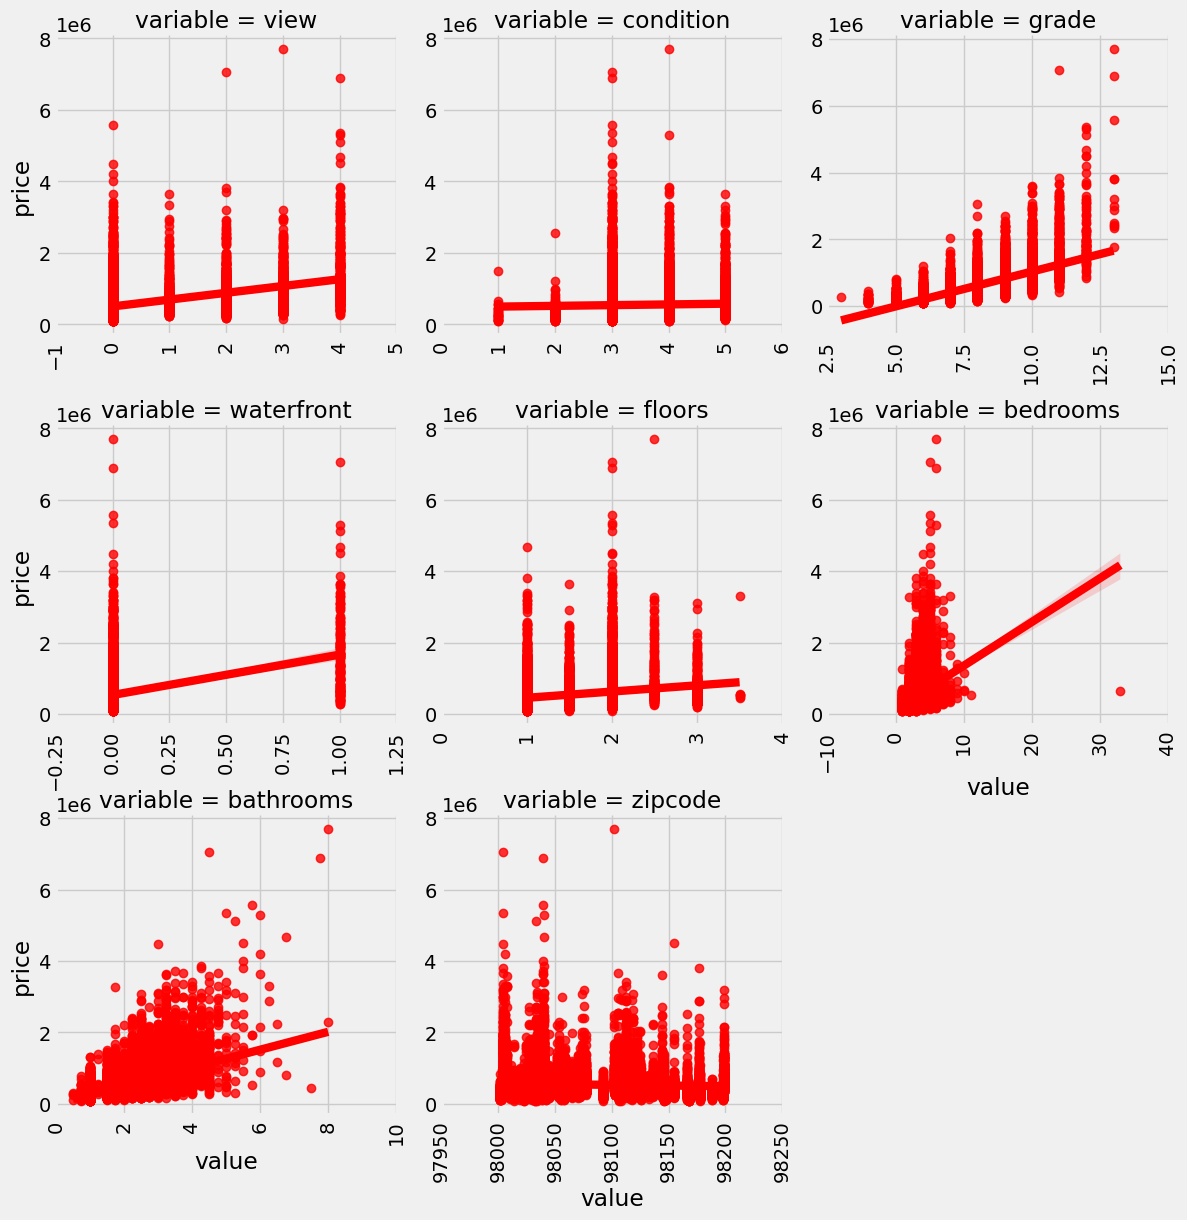

In [26]:
# mencoba viz dengan garis linear regresi

kat_2 = pd.melt(df,id_vars='price', value_vars=col_kat)
g = sns.FacetGrid(kat_2, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.regplot, 'value', 'price', color='red')
g.set_xticklabels(rotation=90)

- fitur grade dan price memiliki korelasi yang cukup bagus. begitupun korelasi antara bathroom dan bedroom yang sedikit terlihat korelasinya
- sepertinya pada fitur bedrooms itu perlu kita ganti sudut pandang viz nya

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


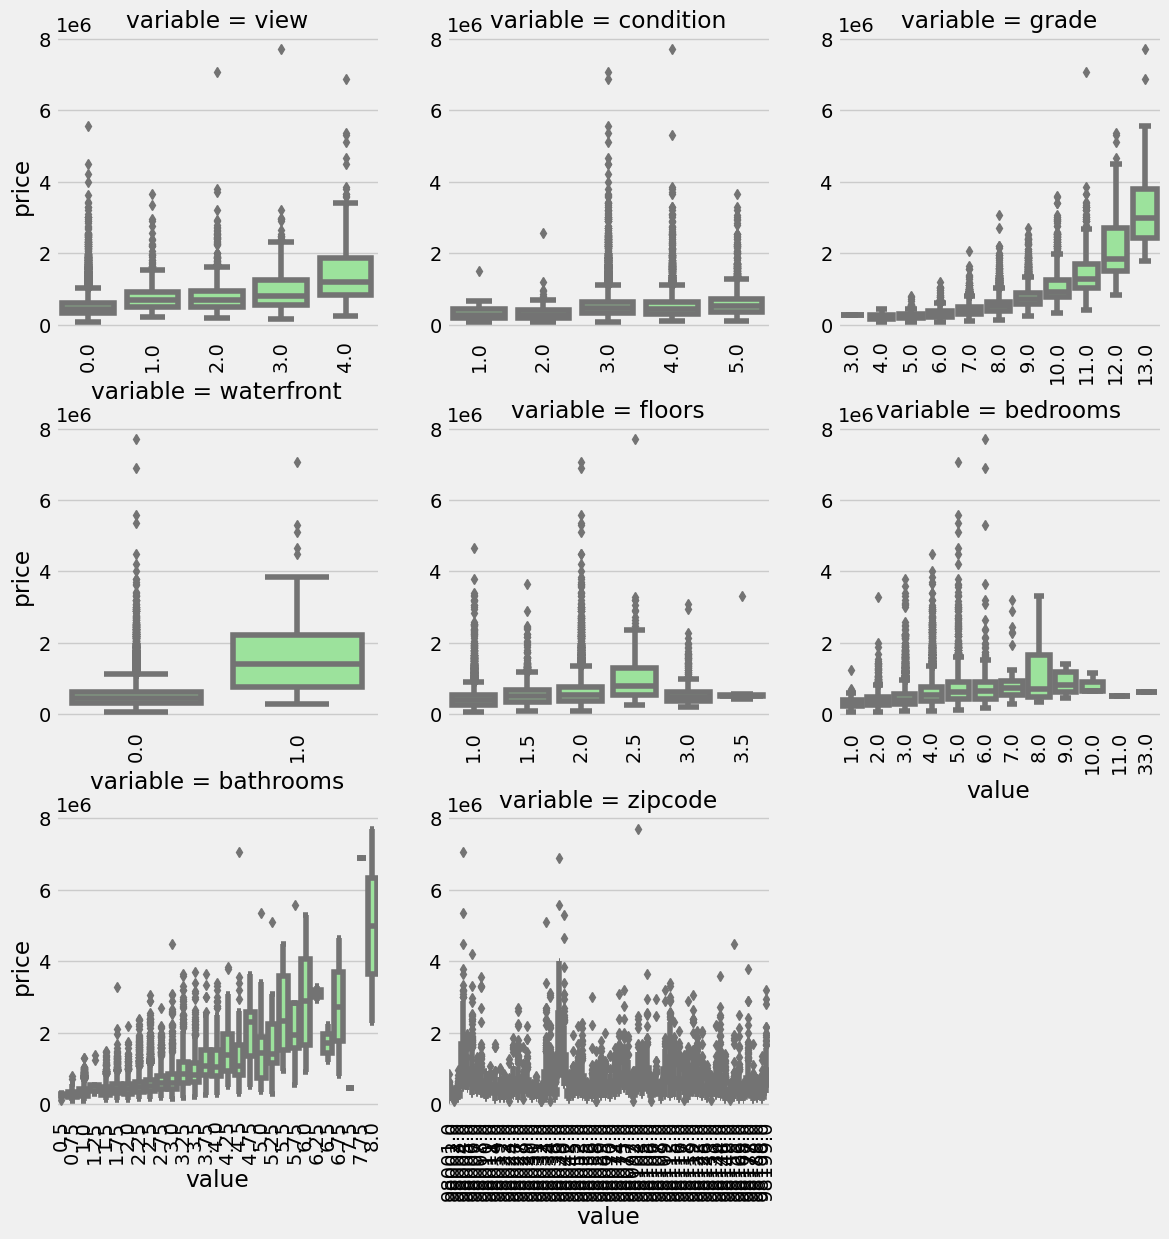

In [27]:
# mencari persebaran outlier untuk cleaning dan untuk menemukan semacam tren

kat_3 = pd.melt(df, id_vars='price', value_vars=col_kat)
g = sns.FacetGrid(kat_3, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.boxplot, 'value', 'price', color='lightgreen')
g.set_xticklabels(rotation=90)

- fitur bathroom dan grade nampaknya memiliki korelasi yang kuat terhadap price. Namun untuk bathroom sepertinya cukup banyak outlier
- sisanya itu korelasi kecil dengan price seperti views juga, tapi nanti kayakynya view dan bathroom dan juga grade itu bakal di one hot encoding (lessgoo 🥶)
- wahh ternyata ada fitur yang punya data kategori outlier, yang paling parah adalah pada fitur bedroom ternyata hanya sedikit atau sedikit sekali yang jumlah kamar 33 jika dibandingkan dengan data lainnya

###### ingin mengetahui beberapa insight dari hubungan antara kategorikal tersbeut terhadap harga
- view
- bedroom/kamar
- waterfront
- floor
- bathroom

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'View vs Harga')

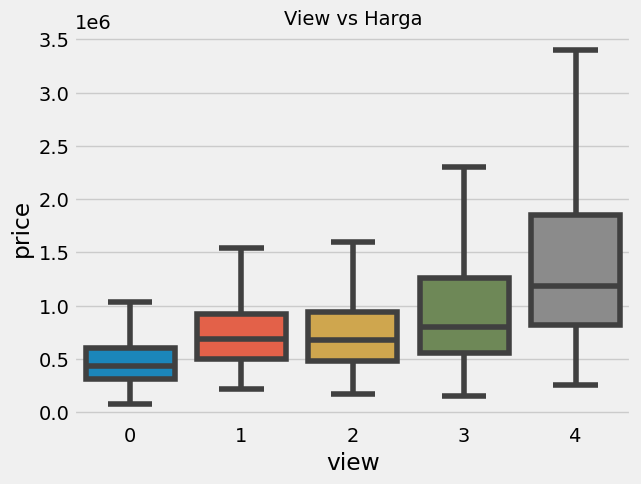

In [28]:
# Pengaruh view terhdap harga
sns.boxplot(data=df, x='view', y='price', showfliers=False)
plt.title('View vs Harga', fontsize=14)

<IPython.core.display.Javascript object>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1752\2024955933.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['view']==0]['price'],color='orange', hist=False, label='view0')


<IPython.core.display.Javascript object>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1752\2024955933.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['view']==1]['price'],color='green', hist=False, label='view1')


<IPython.core.display.Javascript object>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1752\2024955933.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['view']==2]['price'],color='red', hist=False, label='view2')


<IPython.core.display.Javascript object>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1752\2024955933.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['view']==3]['price'],color='yellow', hist=False, label='view3')


<IPython.core.display.Javascript object>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1752\2024955933.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['view']==4]['price'],color='blue', hist=False, label='view4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

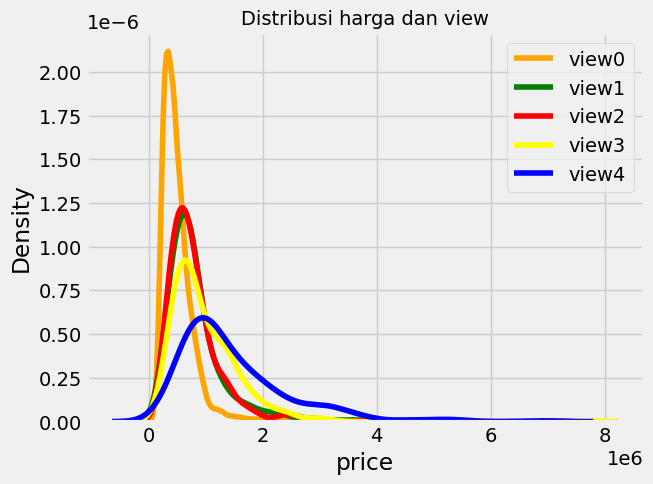

In [29]:
# hubungan distribusi
sns.distplot(df[df['view']==0]['price'],color='orange', hist=False, label='view0')
sns.distplot(df[df['view']==1]['price'],color='green', hist=False, label='view1')
sns.distplot(df[df['view']==2]['price'],color='red', hist=False, label='view2')
sns.distplot(df[df['view']==3]['price'],color='yellow', hist=False, label='view3')
sns.distplot(df[df['view']==4]['price'],color='blue', hist=False, label='view4')
plt.title('Distribusi harga dan view', fontsize=14)
plt.legend()

In [30]:
#statistik
price_view0 = df[df['view']==0]['price']
price_view1 = df[df['view']==1]['price']
price_view2 = df[df['view']==2]['price']
price_view3 = df[df['view']==3]['price']
price_view4 = df[df['view']==4]['price']

alpha = 0.05
annova_test = stats.f_oneway(price_view0,price_view1,price_view2,price_view3,price_view4)

if annova_test.pvalue < alpha :
    print(f'Kesimpulan : nilai p_value {annova_test.pvalue} kurang dari alpha {alpha}')
    print('Ada perbedaan harga yang signifikan dari setiap view')

else :
    print(f'Kesimpulan : nilai p_value {annova_test.pvalue} lebih dari alpha {alpha}')
    print('Tidak ada perbedaan harga yang signifikan dari setiap view')

<IPython.core.display.Javascript object>

Kesimpulan : nilai p_value 0.0 kurang dari alpha 0.05
Ada perbedaan harga yang signifikan dari setiap view


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Jumlah Kamar vs Harga')

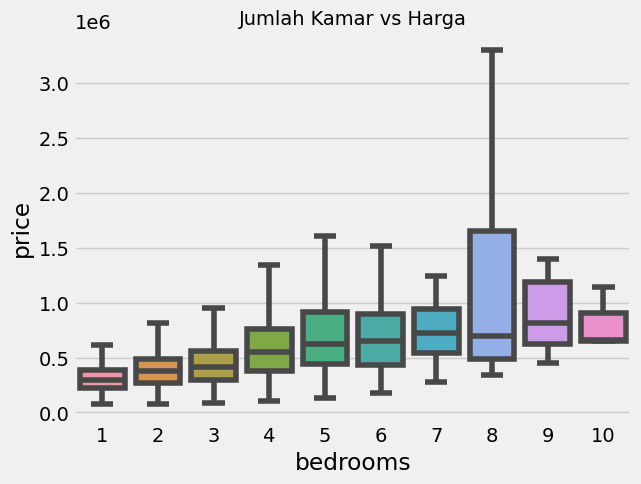

In [31]:
#bedroom
df_rumah = df[df['bedrooms']<11]
sns.boxplot(data=df_rumah,x='bedrooms',y='price',showfliers=False)
plt.title('Jumlah Kamar vs Harga',fontsize=14)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Jumlah Kamar vs luas')

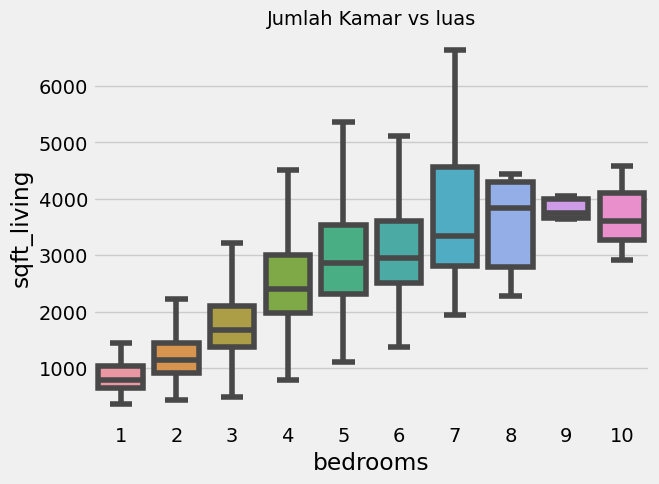

In [32]:
#hubungan kamar dengan luas
sns.boxplot(data=df_rumah,x='bedrooms',y='sqft_living',showfliers=False)
plt.title('Jumlah Kamar vs luas',fontsize=14)

Jumlah kamar berpengaruh terhadap harga rumah hal ini didukung dengan :

- Boxplot Hubungan Jumlah Kamar dan Harga Rumah, trend harga meningkat seiring dengan bertambahnya jumlah kamar
- Boxplot Hubungan Jumlah Kamar dan Luas Bangunan, dimana semakin banyak jumlah kamar semakin besar luas bangunan rumah

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1752\416561263.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df_rumah[df_rumah['bedrooms']==8]['price']),color='orange',hist=False,label='8 Kamar')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1752\416561263.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df_rumah[df_rumah['bedrooms']==9]['price']),color='red',hist=False,label='9 Kamar')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

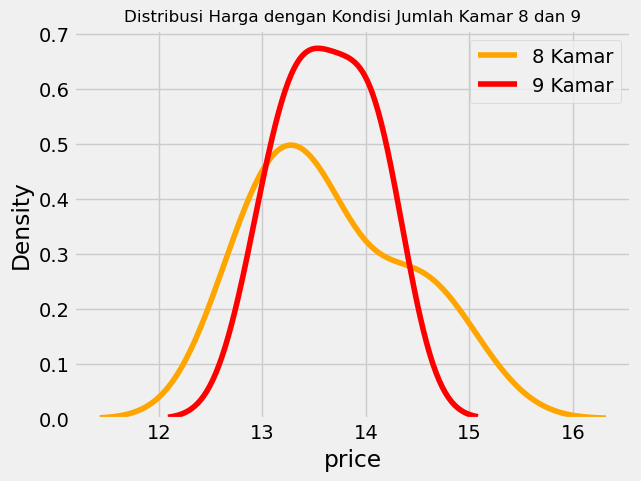

In [33]:
#aku udah coba yang 7 dan 8, tapi pengen nyoba 8 dan 9
#transformasi menjadi distribusi normal

sns.distplot(np.log1p(df_rumah[df_rumah['bedrooms']==8]['price']),color='orange',hist=False,label='8 Kamar')
sns.distplot(np.log1p(df_rumah[df_rumah['bedrooms']==9]['price']),color='red',hist=False,label='9 Kamar')
plt.title('Distribusi Harga dengan Kondisi Jumlah Kamar 8 dan 9',fontsize=12)
plt.legend()

In [34]:
price_9 = np.log1p(df_rumah[df_rumah['bedrooms']==9]['price'])
price_8 = np.log1p(df_rumah[df_rumah['bedrooms']==8]['price'])

alpha = 0.05
t_value1,p_value1 = stats.f_oneway(price_8,price_9)

if p_value1 < alpha :
    print(f'Kesimpulan : nilai p_value {p_value1} kurang dari alpha {alpha}')
    print('Ada perbedaan yang signifikan dari segi harga antara rumah dengan jumlah kamar 7 dan 8')

else :
    print(f'Kesimpulan : nilai p_value {p_value1} lebih dari alpha {alpha}')
    print('Tidak ada perbedaan yang signifikan dari segi harga antara rumah dengan jumlah kamar 7 dan 8')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Kesimpulan : nilai p_value 0.9264991982881654 lebih dari alpha 0.05
Tidak ada perbedaan yang signifikan dari segi harga antara rumah dengan jumlah kamar 7 dan 8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Waterfront vs Harga')

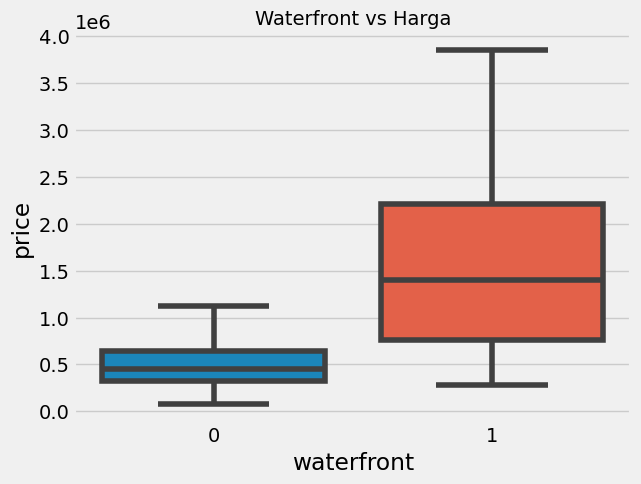

In [35]:
# waterfront (1 artinya ada pemandangan perariran)
sns.boxplot(data=df,x='waterfront',y='price',showfliers=False)
plt.title('Waterfront vs Harga',fontsize=14)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

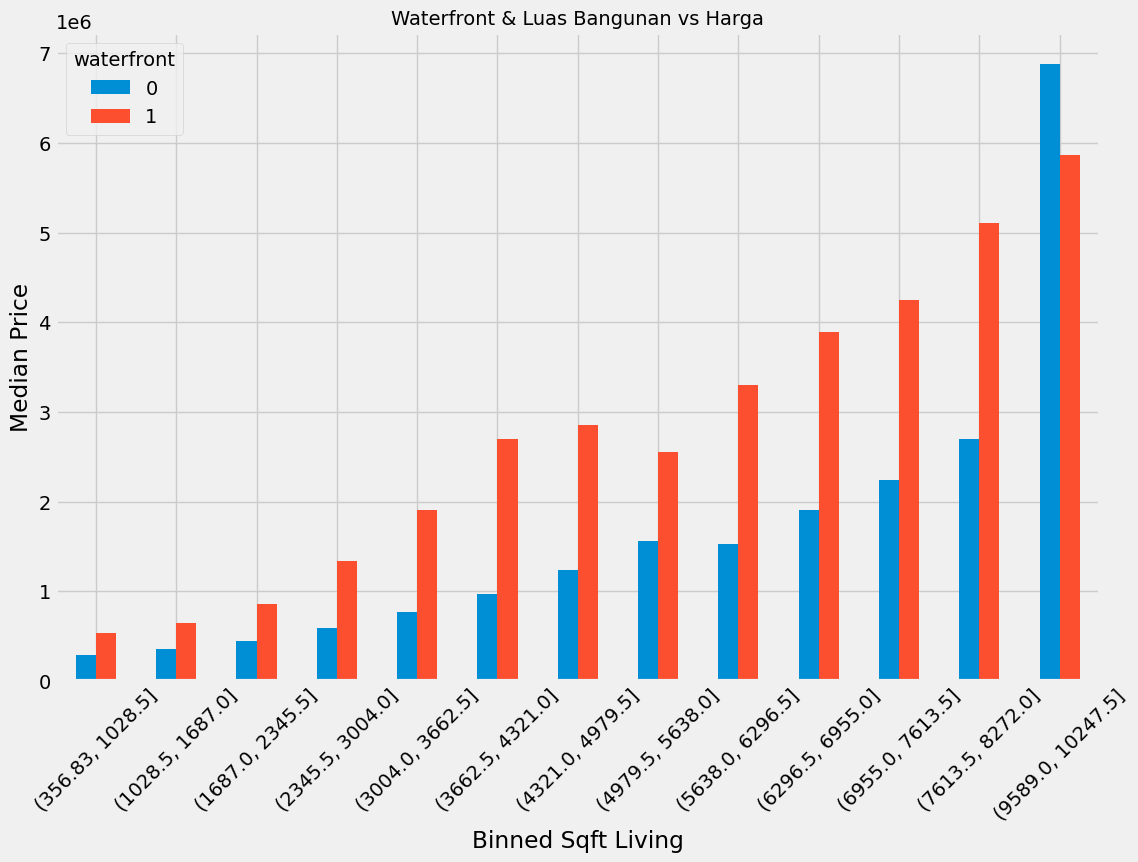

In [36]:
# coba pengaruh pemandangan air terhadap luas

df_luas = df

df_luas['sqft_living_bins'] = pd.cut(df_luas['sqft_living'], bins=20)  

pivot_df = pd.pivot_table(df_luas, index='sqft_living_bins', columns='waterfront', values='price', aggfunc='median')

pivot_df.dropna(inplace=True)

pivot_df.plot(kind='bar', figsize=(12, 8))
plt.title('Waterfront & Luas Bangunan vs Harga', fontsize=14)
plt.xlabel('Binned Sqft Living')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1752\439497697.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df[df['waterfront']==1]['price']),color='orange',hist=False,label='Waterfront')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1752\439497697.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df[df['waterfront']==0]['price']),color='red',hist=False,label='No Waterfront')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

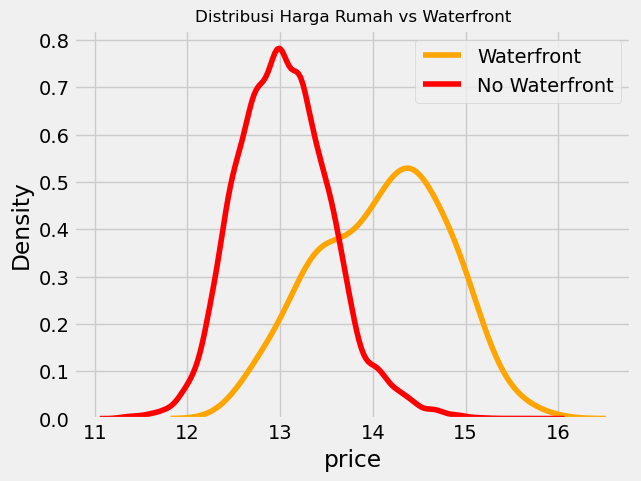

In [37]:
#mengetahui hubungan distribusi harga rumah dengan lokasi rumah
#melakukan transformasi agar menjadi distribusi normal

sns.distplot(np.log1p(df[df['waterfront']==1]['price']),color='orange',hist=False,label='Waterfront')
sns.distplot(np.log1p(df[df['waterfront']==0]['price']),color='red',hist=False,label='No Waterfront')
plt.title('Distribusi Harga Rumah vs Waterfront',fontsize=12)
plt.legend()

In [38]:
#menguji secara statistik
#melakukan transformasi agar menjadi distribusi normal

price_with = np.log1p(df[df['waterfront']==1]['price'])
price_without = np.log1p(df[df['waterfront']==0]['price'])

alpha = 0.05
t_value1,p_value1 = stats.ttest_ind(price_without,price_with)

if p_value1 < alpha :
    print(f'Kesimpulan : nilai p_value {p_value1} kurang dari alpha {alpha}')
    print('Ada perbedaan yang signifikan dari segi harga antara rumah yang berlokasi dekat pantai/danau/sungai dan tidak')

else :
    print(f'Kesimpulan : nilai p_value {p_value1} lebih dari alpha {alpha}')
    print('Tidak ada perbedaan yang signifikan dari segi harga antara rumah yang berlokasi dekat pantai.danau/sungai dan tidak')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Kesimpulan : nilai p_value 1.4726199735293004e-147 kurang dari alpha 0.05
Ada perbedaan yang signifikan dari segi harga antara rumah yang berlokasi dekat pantai/danau/sungai dan tidak


Dari hasil uji statistik dan boxplot, dapat diketahui bahwa lokasi rumah yang dekat dengan pemandangan waterfron memiliki harga yang lebih tinggi daripada yang tidak. Lalu jika kita bandingkan rumah dengan luas bangunan yang sama, harga rumah tetap lebih tinggi jika dekat dengan waterfront, tetapi harga rumah cenderung fluktuatif

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Jumlah Lantai vs Harga')

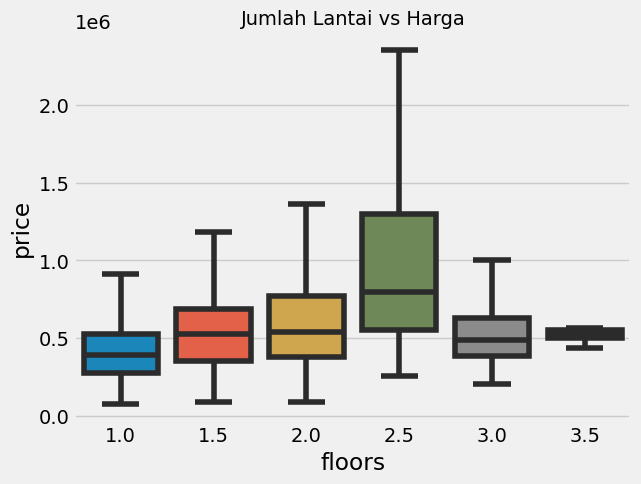

In [39]:
# Floor
sns.boxplot(data=df,x='floors',y='price',showfliers=False)
plt.title('Jumlah Lantai vs Harga',fontsize=14)

In [40]:
pd.pivot_table(df,index='sqft_living',columns='floors',values='price',aggfunc='median').dropna()
pivot_floor = round(pd.pivot_table(df,index='sqft_living',columns='floors',values='price',aggfunc='median').dropna(),2)
pivot_floor

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

floors,1.0,1.5,2.0,2.5,3.0,3.5
sqft_living,,,,,,
1730,337500.0,270000.0,353750.0,676000.0,601225.0,502000.0


Dari data diatas, dapat disimpulkan bahwa harga rumah paling tinggi saat jumlah lantai adalah 2.5. Hal ini didukung dengan :
- Boxplot hubungan Jumlah Lantai dengan Harga, harga rumah meningkat sampai pada kondisi rumah dengan 2.5 lantai diatas 2.5 harga rumah mengalami penurunan
- Ketika kita membandingkan jumlah lantai pada luas bangunan yang sama, dapat diketahui bahwa harga rumah cenderung paling mahal saat rumah memiliki 2.5 lant

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Jumlah Kamar mandi vs Harga')

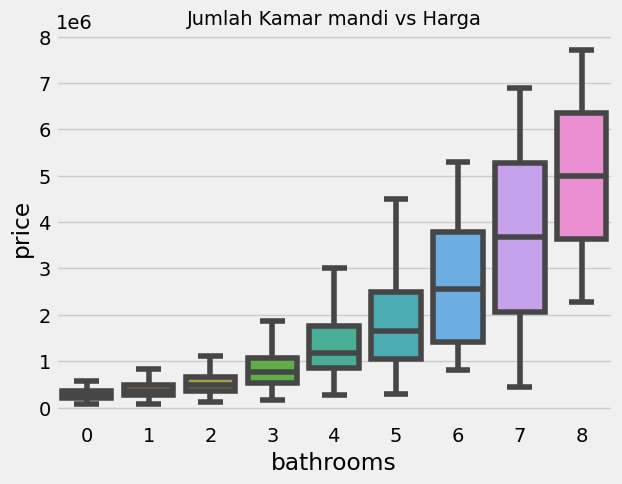

In [41]:
#bathroom
df_m = df
df_m['bathrooms'] = df_m['bathrooms'].astype(int)

sns.boxplot(data=df_m,x='bathrooms',y='price',showfliers=False)
plt.title('Jumlah Kamar mandi vs Harga',fontsize=14)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Luas Kamar Mandi vs Harga')

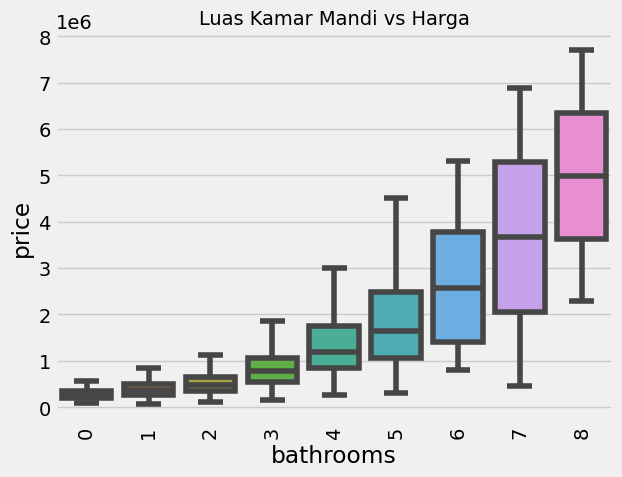

In [42]:
#hubungan kamar mandi dengan luas
sns.boxplot(data=df_m,x='bathrooms',y='price',showfliers=False)
plt.xticks(rotation=90);
plt.title('Luas Kamar Mandi vs Harga', fontsize=14)

Dari boxplot diatas, dapat diketahui bahwa luas kamar mandi berpengaruh pada harga dan cukup linear. Harga akan meningkat seiring bertambahnya luas kamar mandi.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1752\562587262.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df_m[df_m['bathrooms']==5]['price']),color='orange',hist=False,label='5 Kamar mandi')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1752\562587262.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df_m[df_m['bathrooms']==6]['price']),color='red',hist=False,label='6 Kamar mandi')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

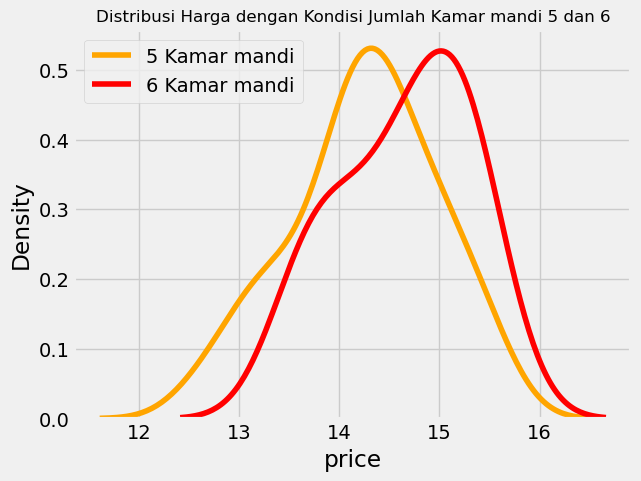

In [43]:
#aku udah coba yang 7 dan 8, tapi pengen nyoba 6 dan 7
#transformasi menjadi distribusi normal

sns.distplot(np.log1p(df_m[df_m['bathrooms']==5]['price']),color='orange',hist=False,label='5 Kamar mandi')
sns.distplot(np.log1p(df_m[df_m['bathrooms']==6]['price']),color='red',hist=False,label='6 Kamar mandi')
plt.title('Distribusi Harga dengan Kondisi Jumlah Kamar mandi 5 dan 6',fontsize=12)
plt.legend()


In [44]:
mandi_6 = np.log1p(df_m[df_m['bathrooms']==5]['price'])
mandi_5 = np.log1p(df_m[df_m['bathrooms']==5]['price'])

alpha = 0.05
t_value1,p_value1 = stats.f_oneway(mandi_5,mandi_6)

if p_value1 < alpha :
    print(f'Kesimpulan : nilai p_value {p_value1} kurang dari alpha {alpha}')
    print('Ada perbedaan yang signifikan dari segi harga antara rumah dengan jumlah kamar mandi 5 dan 6')

else :
    print(f'Kesimpulan : nilai p_value {p_value1} lebih dari alpha {alpha}')
    print('Tidak ada perbedaan yang signifikan dari segi harga antara rumah dengan jumlah kamar mandi 5 dan 6')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Kesimpulan : nilai p_value 1.0 lebih dari alpha 0.05
Tidak ada perbedaan yang signifikan dari segi harga antara rumah dengan jumlah kamar mandi 5 dan 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='zipcode', ylabel='median price'>

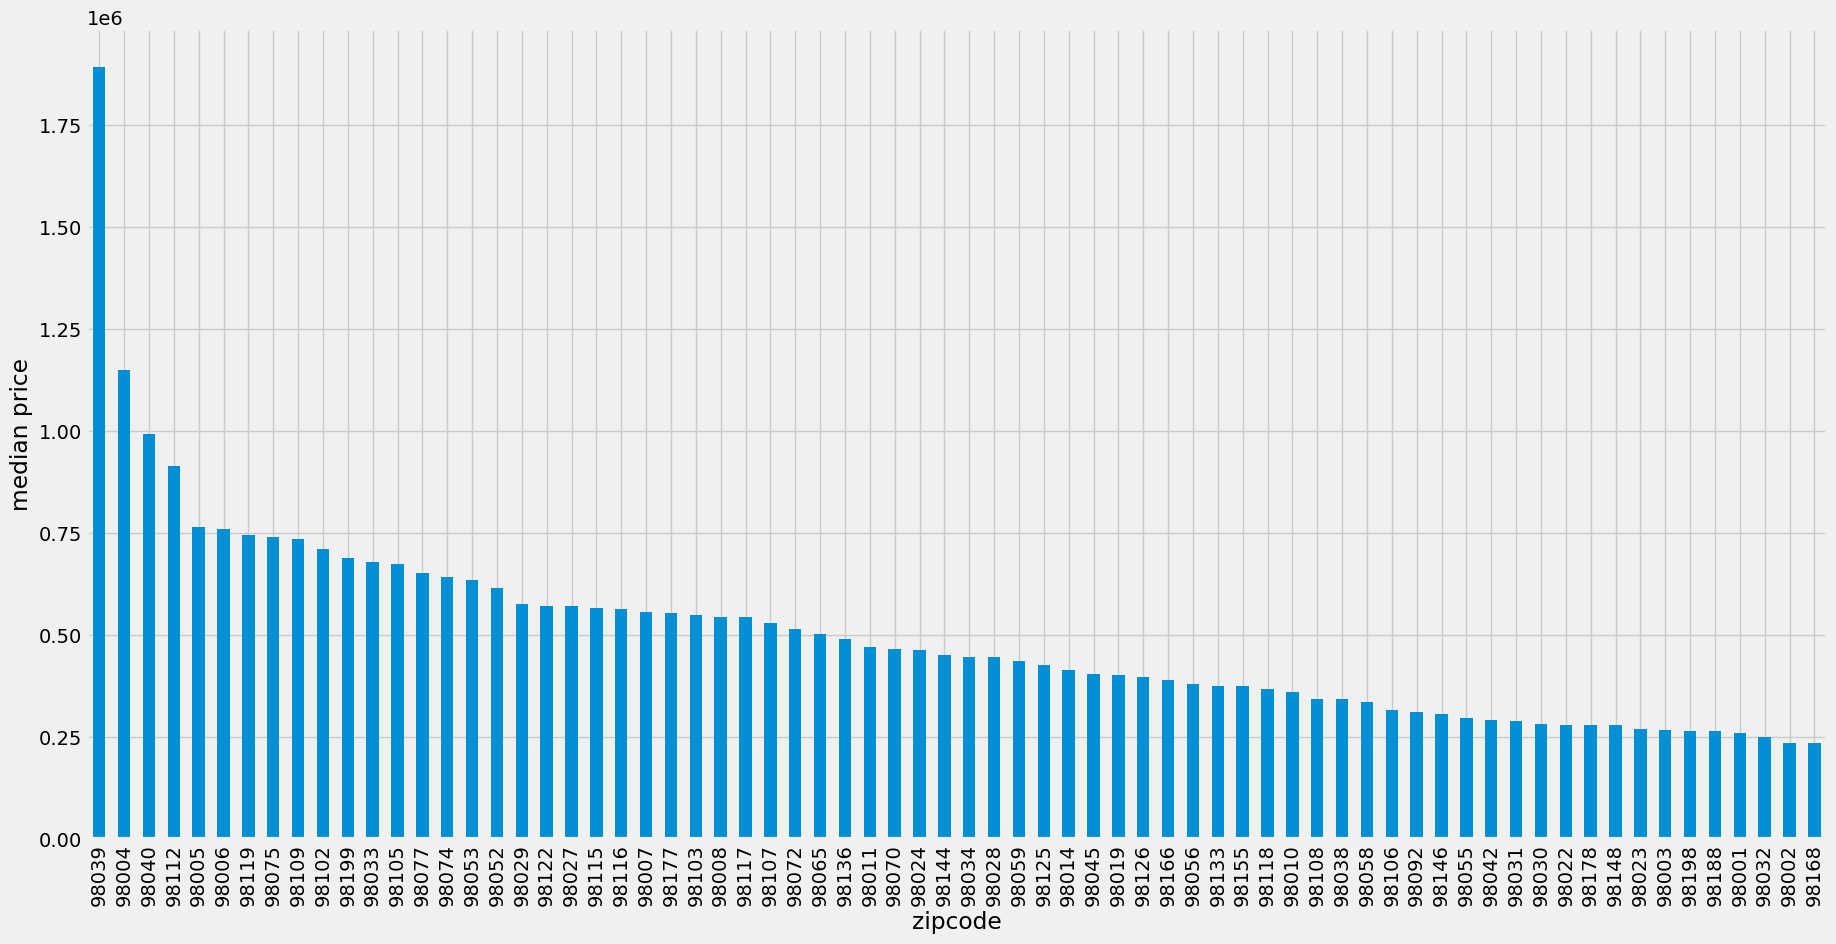

In [45]:
df_zipcode = df.groupby(['zipcode']).price.median().sort_values(ascending=False)
plt.figure(figsize=(20,10))
plt.ylabel('median price')
df_zipcode.plot(kind='bar')

##### Kesimpulan EDA

Jadi berdasarkan beberapa hasil analisis diketahui bahwa ada beberapa faktor penentu:

- Luas bangunan sebanding dengan peningkatan harga rumah
- Jumlah kamar paling optimal adalah 7
- Jumlah lantai paling optimal adalah 2.5
- Jumlah kamar mandi yang optimal itu ada 5 atau 6

Berdasarkan beberapa visualisasi dengan mengetahui sebaran distribusi antara variabel independen dengan target. Dapat diketahui bahwa variabel yang tidak ada perbedaan signifikan melalui cek nilai p itu mungkin memiliki korelasi yang baik terhadap target.

##### Bersihin datanya

In [51]:
df[df['bedrooms']>=11]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,waktu,sqft_living_bins,sale_age
8757,520000.0,11,3,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,1420,4960,2014-08-21,"(2345.5, 3004.0]",15
15870,640000.0,33,1,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,1330,4700,2014-06-25,"(1028.5, 1687.0]",67


In [54]:
# tadi ada outlier di bedroom atau jml kamar
# kalau dilihat-llihat kayaknya yang 11 (kayakny ngga) atau jml_kamar 33 itu sepertinya typo ketika ingin memasukan nilai 3
df.replace({'bedrooms': {33:3}}, inplace=True)
df.bedrooms.value_counts()

bedrooms
3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [55]:
# kamar mandi 0?
df[df.bathrooms==0].sort_values('price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,waktu,sqft_living_bins,sale_age
7606,785000.0,2,0,1260,4800,1.5,0,2,4,6,1080,180,1942,0,98033,2660,7200,2014-08-12,"(1028.5, 1687.0]",72
19198,699999.0,3,0,1240,4000,1.0,0,0,4,7,1240,0,1968,0,98112,1460,4000,2015-01-22,"(1028.5, 1687.0]",47
2680,562100.0,2,0,1440,3700,1.0,0,0,3,7,1200,240,1914,0,98107,1440,4300,2014-06-25,"(1028.5, 1687.0]",100
18990,550000.0,2,0,1040,4000,1.0,0,0,3,7,930,110,1909,0,98119,1700,4800,2014-09-16,"(1028.5, 1687.0]",105
1484,530000.0,3,0,920,20412,1.0,1,2,5,6,920,0,1950,0,98070,1162,54705,2014-12-30,"(356.83, 1028.5]",64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18508,115000.0,2,0,550,7980,1.0,0,0,3,5,550,0,1952,0,98146,1330,7980,2014-07-15,"(356.83, 1028.5]",62
10424,109000.0,2,0,580,6900,1.0,0,0,3,5,580,0,1941,0,98118,1570,5040,2015-01-14,"(356.83, 1028.5]",74
16340,100000.0,2,0,660,5240,1.0,0,0,4,4,660,0,1912,0,98032,850,5080,2014-07-03,"(356.83, 1028.5]",102
3805,95000.0,1,0,760,5746,1.0,0,0,4,5,760,0,1915,0,98002,970,6696,2015-05-05,"(356.83, 1028.5]",100


kita gabisa hapus data bathroom yang 0 karena kita sudah mengetahui bahwa relasi bathroom dan price itu cukup bagus, sehingga nantinya akan diganti ke float lalu akan mengganti nilai nol kamar mandi dengan 0.25 karena itu adalah nilai minimum untuk setiap properti. tidak menutup kemungkinan bahwa data yang 0 itu pada kenyatannya memang tidak mempunyai kamar mandi, namun disini aku taruh 0.25 atau 1/4 itu karena suatu ruangan itu pasti memili wastafel, toilet, dan lain-lain.

In [57]:
df['bathrooms'] = df['bathrooms'].astype(float)
df.replace({'bathrooms': {0: 0.25}}, inplace=True)
df.bathrooms.value_counts()

bathrooms
2.00    10539
1.00     8353
3.00     2228
4.00      338
0.25       75
5.00       48
6.00       12
8.00        2
7.00        2
Name: count, dtype: int64

In [58]:
df[df.grade==11].sort_values('price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,waktu,sqft_living_bins,sale_age
3914,7062500.0,5,4.0,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,3930,25449,2014-06-11,"(9589.0, 10247.5]",13
2085,3850000.0,4,4.0,5770,21300,2.0,1,4,4,11,5770,0,1980,0,98040,4620,22748,2014-11-14,"(5638.0, 6296.5]",34
6508,3650000.0,6,4.0,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,98105,3510,15810,2015-04-21,"(4979.5, 5638.0]",79
15255,3640900.0,4,3.0,4830,22257,2.0,1,4,4,11,4830,0,1990,0,98039,3820,25582,2014-09-11,"(4321.0, 4979.5]",24
5880,3418800.0,5,5.0,5450,20412,2.0,0,0,3,11,5450,0,2014,0,98039,3160,17825,2014-10-07,"(4979.5, 5638.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,610000.0,3,2.0,3440,18167,2.0,0,0,3,11,3440,0,1991,0,98023,3990,20239,2014-08-17,"(3004.0, 3662.5]",23
11159,575000.0,4,2.0,4620,20793,2.0,0,0,4,11,4620,0,1991,0,98023,3640,20793,2014-06-24,"(4321.0, 4979.5]",23
1310,556000.0,5,2.0,3840,16905,2.0,0,0,3,11,3840,0,1991,0,98023,3270,12133,2014-05-23,"(3662.5, 4321.0]",23
17949,550000.0,4,3.0,4180,35169,2.0,0,0,3,11,4180,0,1986,1998,98038,3010,35190,2014-09-24,"(3662.5, 4321.0]",16


grade mnurut aku cukup terdistribusi secara baik

### Feature Engineering
scaling dengan log transformation itu dilakukan ketika suatu fitur itu distribusinya skew

In [49]:
# Disini mau mencoba untuk mengetahui usia properti saat penjualan. Dimana akan mengambil datanya melalui yr built dan renovated
df['sale_age'] = df.waktu.dt.year - df[['yr_built', 'yr_renovated']].max(axis=1)

In [52]:
pd.set_option('display.max_rows', 20)
df.sale_age.value_counts(ascending=False)

<IPython.core.display.Javascript object>

sale_age
 0      516
 9      497
 8      480
 11     464
 10     459
       ... 
 113     27
 115     21
-1       18
 81      16
 80      13
Name: count, Length: 117, dtype: int64

In [60]:
# -1
df.replace({'sale_age': {-1: 0}}, inplace=True)
df.sale_age.value_counts()

sale_age
0      534
9      497
8      480
11     464
10     459
      ... 
112     31
113     27
115     21
81      16
80      13
Name: count, Length: 116, dtype: int64

In [68]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,waktu,sale_age
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014-10-13,59
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014-12-09,23
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015-02-25,82
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014-12-09,49
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015-02-18,28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

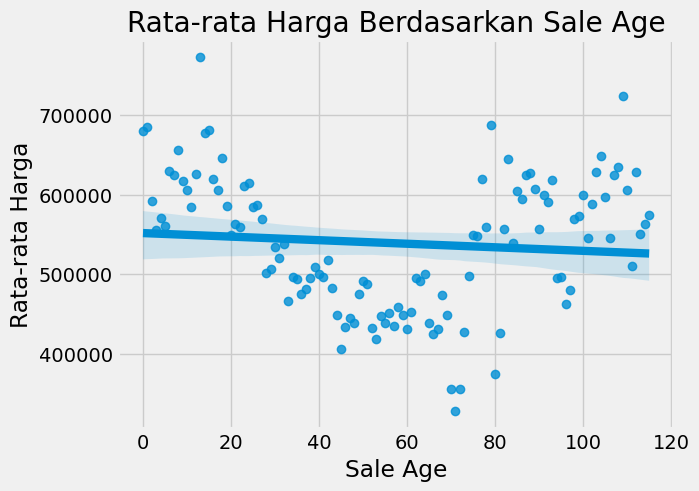

In [71]:
# age
mean_price_by_age = df.groupby('sale_age')['price'].mean().reset_index()

sns.regplot(x='sale_age', y='price', data=mean_price_by_age)

plt.title('Rata-rata Harga Berdasarkan Sale Age')
plt.xlabel('Sale Age')
plt.ylabel('Rata-rata Harga')
plt.show()

In [73]:
df['umur'] = df.waktu.dt.year - df.yr_built

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

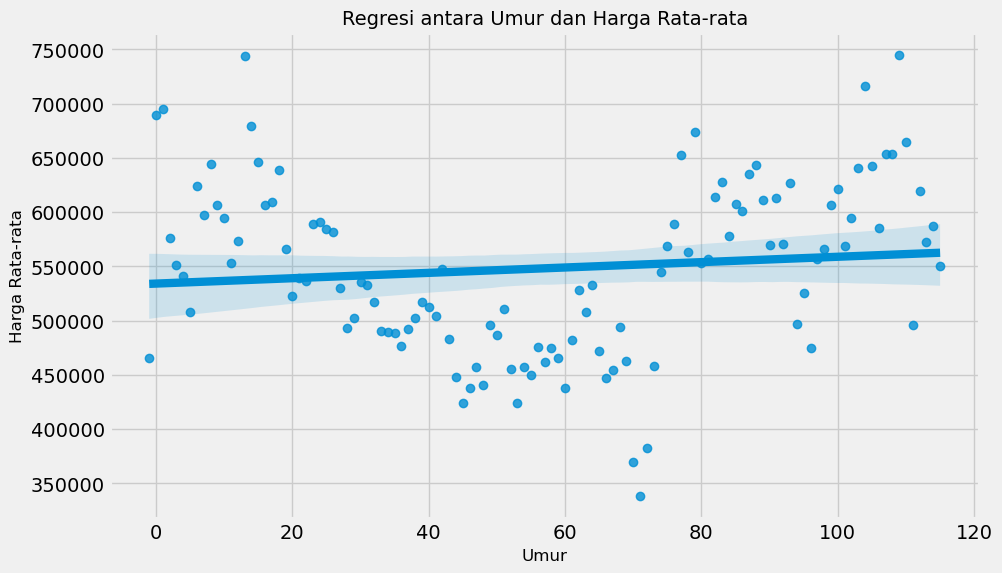

In [75]:
umur_grup = df.groupby('umur')['price'].mean().reset_index()

x_age = umur_grup['umur']
y_age = umur_grup['price']

plt.figure(figsize=(10, 6))
sns.regplot(x=x_age, y=y_age)
plt.title('Regresi antara Umur dan Harga Rata-rata', fontsize=14)
plt.xlabel('Umur', fontsize=12)
plt.ylabel('Harga Rata-rata', fontsize=12)
plt.show()


In [78]:
# ada yang -1
df.replace({'umur': {-1: 0}}, inplace=True)
df.umur.value_counts()

umur
9      472
8      443
0      442
11     431
10     428
      ... 
112     33
113     28
115     26
81      23
80      21
Name: count, Length: 116, dtype: int64

Lalu untuk menyiapkkan dan memudahkan model regresi mengolah dan latih data, aku mau nyiapin data yang terbilang sebaiknya dijadikan kategorikal yaitu basement, renovated, dan viewed.

In [80]:
# atau menjadi binari
df['rennovated'] = df.yr_renovated.apply(lambda x: x if x==0 else 1)
df['basement'] = df.sqft_basement.apply(lambda x: x if x==0 else 1)
df['viewed'] = df.view.apply(lambda x: x if x==0 else 1)

In [82]:
# hapus kolom yang nggak diperluin
df.drop(['yr_renovated', 'sqft_basement', 'view', 'waktu', 'yr_built'], inplace=True, axis=1)

In [85]:
# anomali
print(df.basement.value_counts())
print(df.viewed.value_counts())
print(df.rennovated.value_counts())

basement
0    13110
1     8487
Name: count, dtype: int64
viewed
0    19475
1     2122
Name: count, dtype: int64
rennovated
0    20683
1      914
Name: count, dtype: int64


<IPython.core.display.Javascript object>

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<bound method FacetGrid.set_xticklabels of <seaborn.axisgrid.FacetGrid object at 0x00000234DC24F350>>

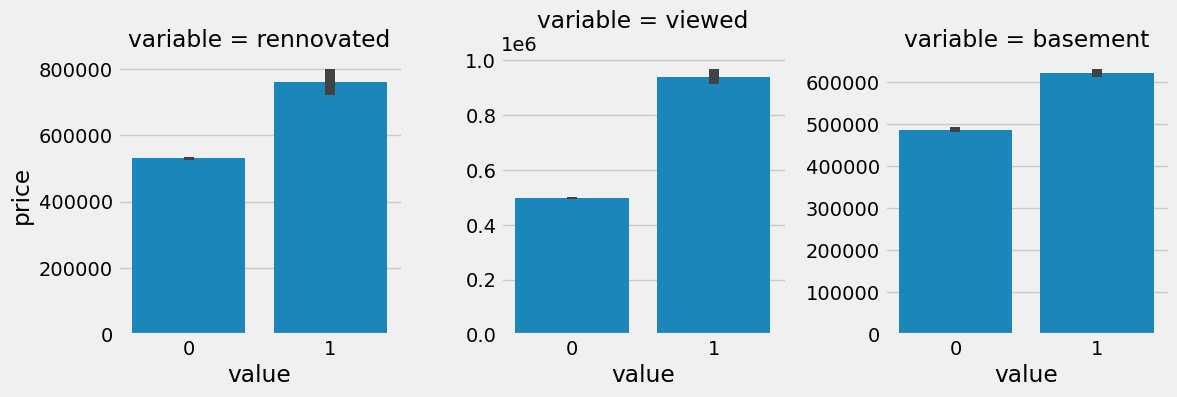

In [87]:
# viz
feat_kat_2 = df[['rennovated', 'viewed', 'basement']]
col_kat_2 = feat_kat_2.columns
kat_4 = pd.melt(df, id_vars='price', value_vars=col_kat_2)
g = sns.FacetGrid(kat_4, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.barplot, 'value', 'price')
g.set_xticklabels

In [89]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,sale_age,umur,rennovated,basement,viewed
0,221900.0,3,1.0,1180,5650,1.0,0,3,7,1180,98178,1340,5650,59,59,0,0,0
1,538000.0,3,2.0,2570,7242,2.0,0,3,7,2170,98125,1690,7639,23,63,1,1,0
2,180000.0,2,1.0,770,10000,1.0,0,3,6,770,98028,2720,8062,82,82,0,0,0
3,604000.0,4,3.0,1960,5000,1.0,0,5,7,1050,98136,1360,5000,49,49,0,1,0
4,510000.0,3,2.0,1680,8080,1.0,0,3,8,1680,98074,1800,7503,28,28,0,0,0


In [88]:
simpann = 'C:/Users/Asus/dataset/harga_rumah_1.csv'
df.to_csv(simpann, index=False)

EDA:
- bedrooms
- bathrooms
- sqft_living
- sqft_above
- sqft_living15
- floors
- sale_age
- basement (0/1)
- waterfront (0/1)
- view (0/1)

one hot encoding:
- bedroom
- bathroom
- floor
- condition
- grade